# LOGISTIC REGRESSION WITH AFFAIRS DATASET

## DATASET

This dataset is a survey of women involved in extra marital affairs taken in 1984

In [75]:
print sm.datasets.fair.SOURCE


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [76]:
print sm.datasets.fair.NOTE

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

## PREDICTION 

Predicting the possibility of an affair

## IMPORTING MODULES

In [66]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [40]:
# Loading the dataset
df = sm.datasets.fair.load_pandas().data
df.head(10)

## DATA PREPROCESSING

In [44]:
# For times which was more than 0, giving them a value of 1
df["affair"] = np.where(df["affairs"] > 0, 1, 0)
df.head(10)

## DATA EXPLORATION

In [46]:
# Checking the rating of marriage by grouping with affair
df.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


 We can see here that people with affairs rate their marriage low

In [47]:
# Checking the the factors that might affect the marriage rate by grouping with rate_marriage
df.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


We can see here that as the age, number of years married and children increases, the rating of marriage declines

## DATA VISUALIZATION

In [70]:
# Plotting in-line
%matplotlib inline

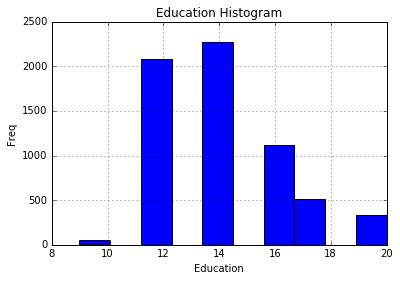

In [71]:
# Checking the distribution of education
df.educ.hist()
plt.title("Education Histogram")
plt.xlabel("Education")
plt.ylabel("Freq")

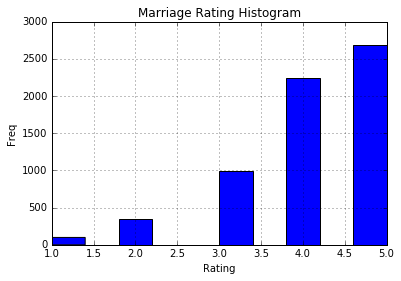

In [72]:
# Checking the distribution of marriage rating
df.rate_marriage.hist()
plt.title("Marriage Rating Histogram")
plt.xlabel("Rating")
plt.ylabel("Freq")

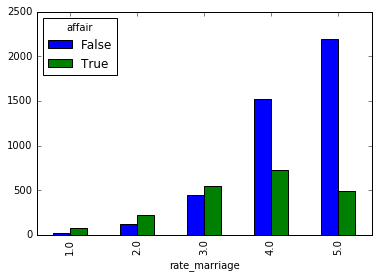

In [51]:
pd.crosstab(df.rate_marriage, df.affair.astype(bool)).plot(kind="bar")

## PREPARING DATA FOR LOGISTIC REGRESSION

In [54]:
# Using the dmatrices function from the patsy module and coverting the dataframe to intercept and values column
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")
print X.columns

In [56]:
# Renaming the columns
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [57]:
# flatten y into a 1-D array in order for the module scikit learn to understand that y is a response variable
y = np.ravel(y)

## SPLITTING DATA INTO TRAIN AND TEST

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## PERFORMING LOGISTIC REGRESSION

In [59]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.72396768402154399

An accuracy of 72% is obtained which is very good

In [60]:
# Predicting for the test dataset
predicted = model.predict(X_test)
# Calculating the accuracy score for the predicted test
print metrics.accuracy_score(y_test, predicted)

In [74]:
# Understanding the meaning of coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.41358283442]
1,occ_2,[0.304254221031]
2,occ_3,[0.592010779933]
3,occ_4,[0.310377206734]
4,occ_5,[0.94474574679]
5,occ_6,[1.0628374531]
6,occ_husb_2,[0.11904546239]
7,occ_husb_3,[0.242483379741]
8,occ_husb_4,[0.0812181842223]
9,occ_husb_5,[0.0440102250325]


We can observe here with negative values of marriage rating and religiousness indicates less probability of an affair. For occupation, in the case of the woman and her husband, when the occupation is student, it is observed that there is least likelihood of an affair.

## PREDICTING WITH NEW ENTRY

In [64]:
model.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]))

/Users/aparnamanohar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.77301477,  0.22698523]])

The predicted probability is 23%